# FeedForward

# FP64 Roofline

In [181]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 1 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp64base = 11379
MAX_NUM_CYCLES_fp64opt = 6711
MAX_NUM_CYCLES_fp64opt_unrolled = 2301

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * FMAC_FLOP
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Maximum number of FLOPS for the linear layer:  25088
Data occupancy for the linear layer: 104.25 KB


In [182]:
# compute the actual number of FLOPS for the layer
def get_flops_per_cycle(LINEAR_FLOP_TOT, cycles):
    return LINEAR_FLOP_TOT / cycles

In [183]:
LINEAR_FLOPS_fp64base = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp64base)
LINEAR_FLOPS_fp64opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp64opt)
LINEAR_FLOPS_fp64opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp64opt_unrolled)

print("Linear FLOPS FP64 Baseline: ", LINEAR_FLOPS_fp64base)
print("Linear FLOPS FP64 Optimized: ", LINEAR_FLOPS_fp64opt)
print("Linear FLOPS FP64 Optimized Unrolled: ", LINEAR_FLOPS_fp64opt_unrolled)

Linear FLOPS FP64 Baseline:  2.2047631602073996
Linear FLOPS FP64 Optimized:  3.738340038742363
Linear FLOPS FP64 Optimized Unrolled:  10.903085614950022


In [184]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 0.23501199040767387


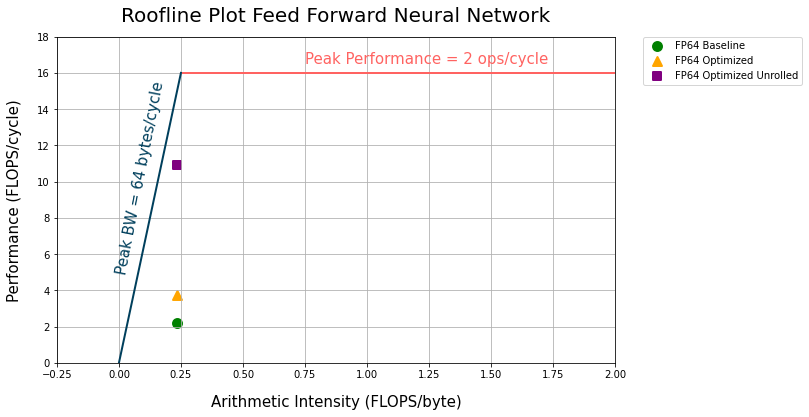

In [185]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.25, 100)
y = peak_BW * x 

plt.rcParams["figure.figsize"] = (10,6)
ax = plt.gca()
# ax.figsize = (10, 6)
ax.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(-0.02, 5, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 79, color='#003f5c')
ax.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.225, xmax = 2, linewidth=2)
# ax.plot(linear_arith_intensity, LINEAR_FLOPS, 'o', color='green', label='FP64 Baseline', markersize=10)
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64base, color='green', label='FP64 Baseline', s=80, linewidth = 2, marker='o')
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt, color='orange', label='FP64 Optimized', s=80, linewidth = 2, marker='^')
ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt_unrolled, color='purple', label='FP64 Optimized Unrolled', s=80, linewidth = 2, marker='s')
# ax.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt, color='magenta', label='FP32 Optimized', s=80, facecolor='none', linewidth = 2)
plt.text(0.75, 16.5,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
ax.set_xlim([-0.25, 2])
ax.set_ylim([0, peak_performance + 2])
# legend next to the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)

<ipython-input-6-b654228c61c0>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


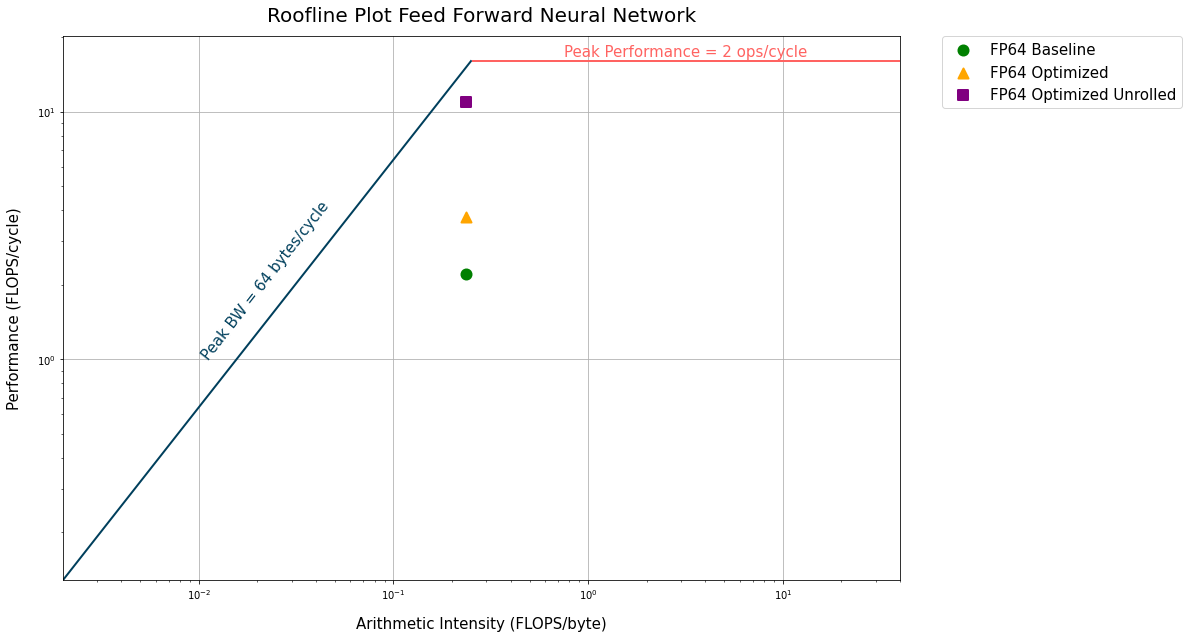

In [6]:
# scatter plot in log scale
plt.rcParams["figure.figsize"] = (15,10)
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 52, color='#003f5c')
plt.text(0.75, 16.8,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.49, xmax = 2, linewidth=2)
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64base, color='green', label='FP64 Baseline', s=100, linewidth = 2, marker='o')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt, color='orange', label='FP64 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp64opt_unrolled, color='purple', label='FP64 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.show()

# FP32 Roofline

In [211]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOP = 2  
peak_performance = FMAC_FLOP * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp32opt = 3700
MAX_NUM_CYCLES_fp32opt_unrolled = 1558

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES * NUM_ITERATIONS

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * FMAC_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Cluster Peak Performance = 32 FLOPS/cycle
Maximum number of FLOPS for the linear layer:  12544.0
Data occupancy for the linear layer: 52.125 KB


In [212]:
LINEAR_FLOPS_fp32opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
LINEAR_FLOPS_fp32opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("FLOPS/cycle for FP32 optimized linear layer: ", LINEAR_FLOPS_fp32opt)
print("FLOPS/cycle for FP32 optimized unrolled linear layer: ", LINEAR_FLOPS_fp32opt_unrolled)

FLOPS/cycle for FP32 optimized linear layer:  3.3902702702702703
FLOPS/cycle for FP32 optimized unrolled linear layer:  8.051347881899872


In [213]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 0.23501199040767387


<ipython-input-214-7f4b2094732c>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


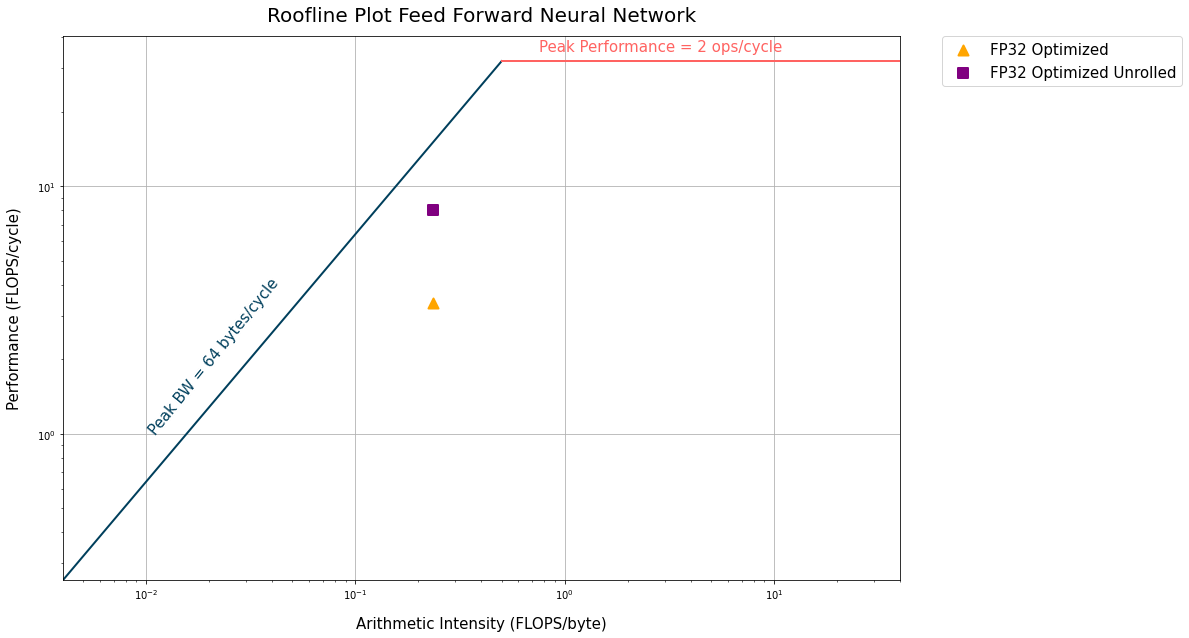

In [214]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.5, 100)
y = peak_BW * x 
plt.rcParams["figure.figsize"] = (15,10)
# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 51, color='#003f5c')
plt.text(0.75, 35,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.525, xmax = 2, linewidth=2)
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt, color='orange', label='FP32 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt_unrolled, color='purple', label='FP32 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.show()

# FP16

In [194]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 4 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES# instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp16opt = 2095
MAX_NUM_CYCLES_fp16opt_unrolled = 936

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Cluster Peak Performance = 128 FLOPS/cycle
Maximum number of FLOPS for the linear layer:  50176.0
Data occupancy for the linear layer: 26.0625 KB


In [196]:
LINEAR_FLOPS_fp16opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp16opt)
LINEAR_FLOPS_fp16opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp16opt_unrolled)

print("FLOPS/cycle for FP16 optimized linear layer: ", LINEAR_FLOPS_fp16opt)
print("FLOPS/cycle for FP16 optimized unrolled linear layer: ", LINEAR_FLOPS_fp16opt_unrolled)

FLOPS/cycle for FP16 optimized linear layer:  23.95035799522673
FLOPS/cycle for FP16 optimized unrolled linear layer:  53.60683760683761


In [197]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 1.880095923261391


<ipython-input-210-7e747acbdbd3>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 80])


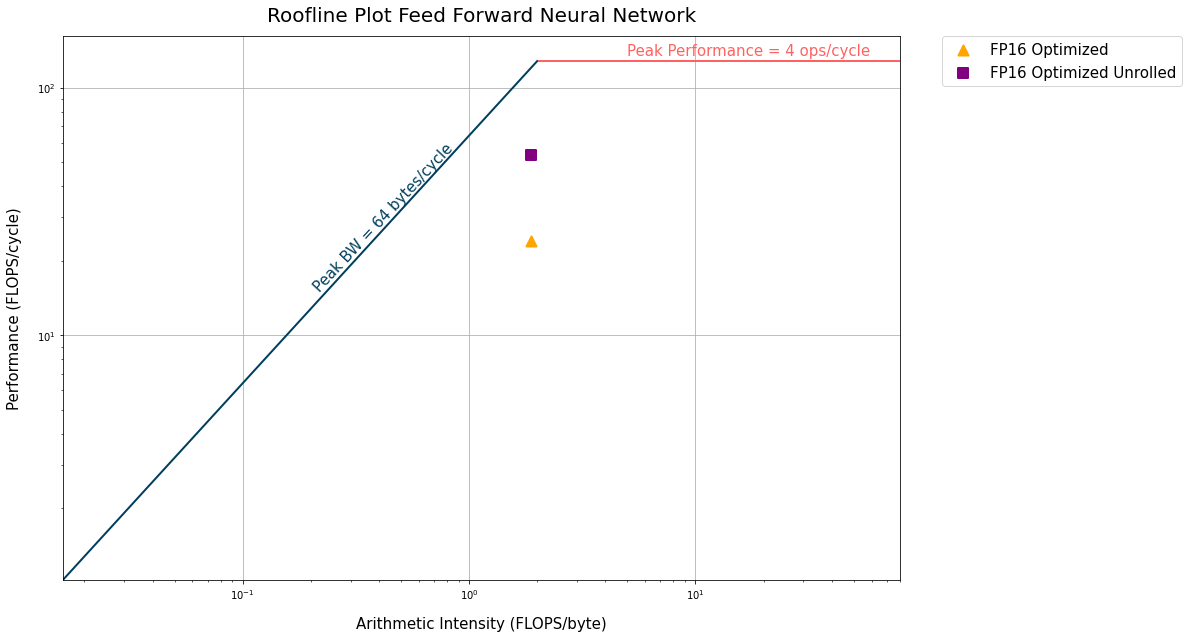

In [210]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 2.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.2, 15, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 47, color='#003f5c')
plt.text(5, 135,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.569, xmax = 5, linewidth=2)
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp16opt, color='orange', label='FP16 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp16opt_unrolled, color='purple', label='FP16 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 80])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.show()

# FP8

In [215]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 8 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES# instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp8opt = 1265
MAX_NUM_CYCLES_fp8opt_unrolled = 779

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Cluster Peak Performance = 256 FLOPS/cycle
Maximum number of FLOPS for the linear layer:  50176.0
Data occupancy for the linear layer: 13.03125 KB


In [216]:
LINEAR_FLOPS_fp8opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp8opt)
LINEAR_FLOPS_fp8opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp8opt_unrolled)

print("FLOPS/cycle for FP8 optimized linear layer: ", LINEAR_FLOPS_fp8opt)
print("FLOPS/cycle for FP8 optimized unrolled linear layer: ", LINEAR_FLOPS_fp8opt_unrolled)

FLOPS/cycle for FP8 optimized linear layer:  39.66482213438735
FLOPS/cycle for FP8 optimized unrolled linear layer:  64.41078305519898


In [217]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 3.760191846522782


<ipython-input-236-78747e1a411d>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 150])


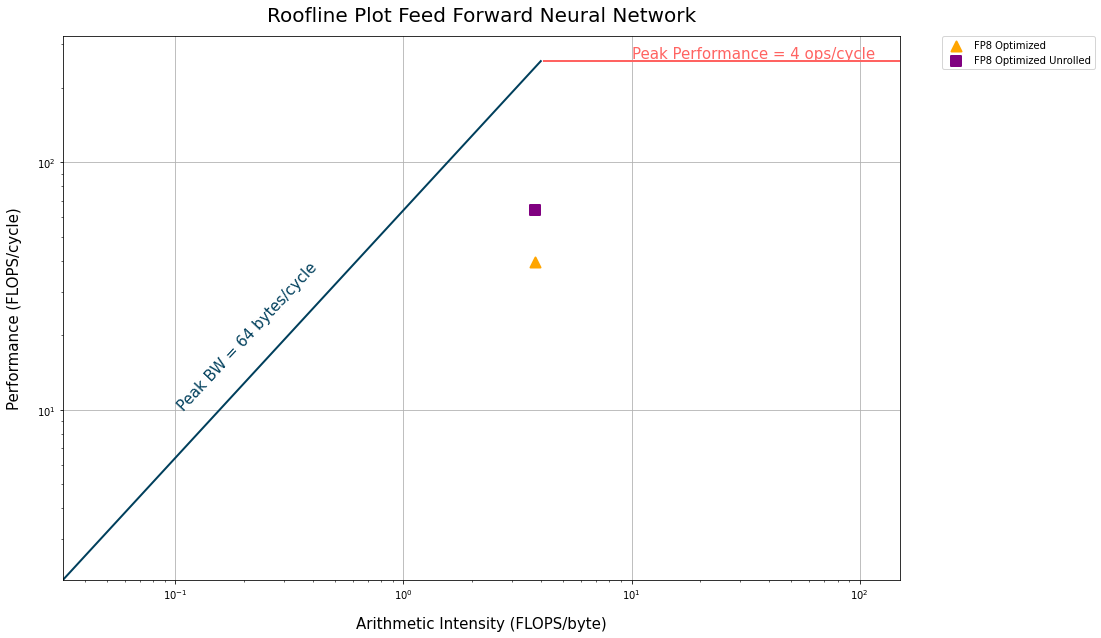

In [236]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 4.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(0.1, 10, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 47, color='#003f5c')
plt.text(10, 262,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.575, xmax = 2, linewidth=2)
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp8opt, color='orange', label='FP8 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp8opt_unrolled, color='purple', label='FP8 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 150])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.show()

# HIGH DIM

In [1]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 3 * 48 * 48
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 8 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES # instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
# MAX_NUM_CYCLES_fp8opt = 1265
MAX_NUM_CYCLES_fp8opt_unrolled = 2427

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Cluster Peak Performance = 256 FLOPS/cycle
Maximum number of FLOPS for the linear layer:  442368.0
Data occupancy for the linear layer: 114.765625 KB


In [5]:
# LINEAR_FLOPS_fp8opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp8opt)
LINEAR_FLOPS_fp8opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp8opt_unrolled)

# print("FLOPS/cycle for FP16 optimized linear layer: ", LINEAR_FLOPS_fp8opt)
print("FLOPS/cycle for FP16 optimized unrolled linear layer: ", LINEAR_FLOPS_fp8opt_unrolled)

FLOPS/cycle for FP16 optimized unrolled linear layer:  182.26946847960446


In [6]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 3.764193328795099


<ipython-input-10-0afbb329521b>:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


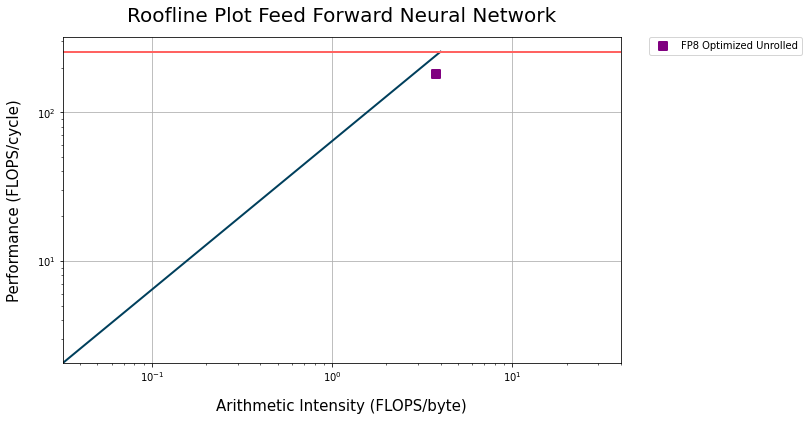

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

plt.rcParams["figure.figsize"] = (10,6)

x = np.linspace(0, 4.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmax = 2, linewidth=2)
# plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt, color='orange', label='FP16 Optimized', s=80, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp8opt_unrolled, color='purple', label='FP8 Optimized Unrolled', s=80, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network', fontsize=20, pad=15)
plt.show()

# Gradient Update

In [237]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 1 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the gradient update layer
MAX_NUM_CYCLES_fp64base = 13025
MAX_NUM_CYCLES_fp64opt = 2594
MAX_NUM_CYCLES_fp64opt_unrolled = 2645

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
GU_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP
print("Maximum number of FLOPS for the gradient update layer: ", GU_FLOP_TOT)

# compute the number of data bytes for the layer
GU_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the gradient update layer: {} KB".format(GU_BYTES / 1024))


Maximum number of FLOPS for the gradient update layer:  25120
Data occupancy for the gradient update layer: 104.25 KB


In [238]:
GU_FLOPS_fp64base = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp64base)
GU_FLOPS_fp64opt = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp64opt)
GU_FLOPS_fp64opt_unrolled = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp64opt_unrolled)

print("GU FLOPS FP64 Baseline: ", GU_FLOPS_fp64base)
print("GU FLOPS FP64 Optimized: ", GU_FLOPS_fp64opt)
print("GU FLOPS FP64 Optimized Unrolled: ", GU_FLOPS_fp64opt_unrolled)

GU FLOPS FP64 Baseline:  1.9285988483685221
GU FLOPS FP64 Optimized:  9.683885890516576
GU FLOPS FP64 Optimized Unrolled:  9.497164461247637


In [239]:
GU_arith_intensity = GU_FLOP_TOT / GU_BYTES
print("GU Arith Intensity:", GU_arith_intensity)

GU Arith Intensity: 0.2353117505995204


<ipython-input-240-abd00ad9fb28>:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


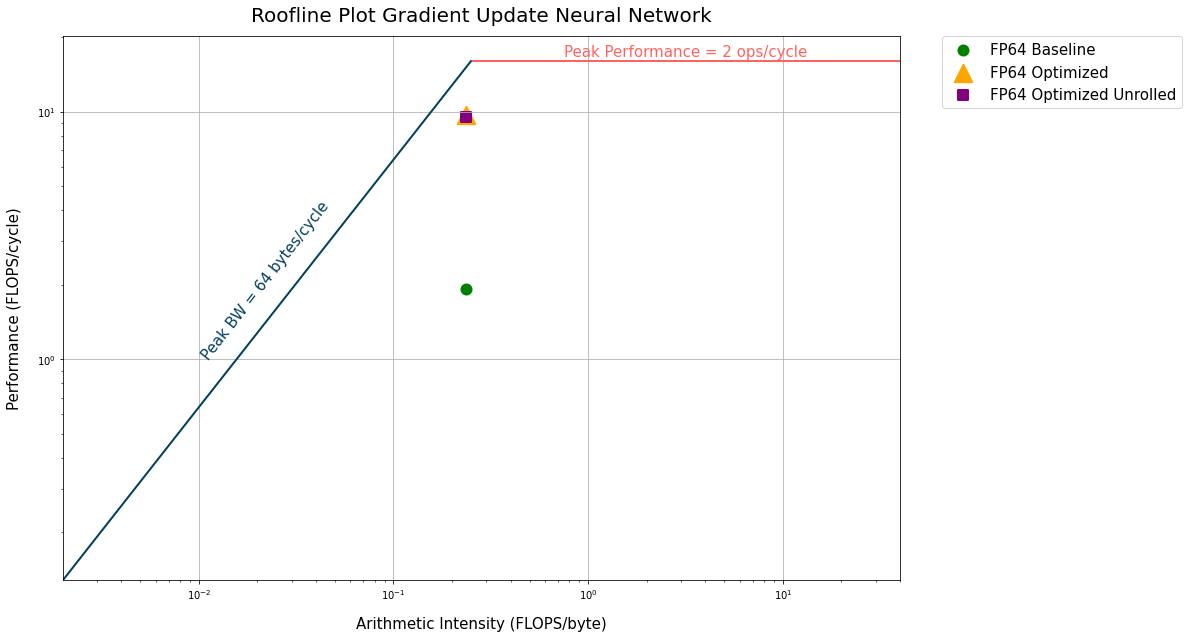

In [240]:
# scatter plot in log scale
plt.rcParams["figure.figsize"] = (15,10)
x = np.linspace(0, 0.25, 100)
y = peak_BW * x 
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 52, color='#003f5c')
plt.text(0.75, 16.8,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.49, xmax = 2, linewidth=2)
plt.scatter(GU_arith_intensity, GU_FLOPS_fp64base, color='green', label='FP64 Baseline', s=100, linewidth = 2, marker='o')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp64opt, color='orange', label='FP64 Optimized', s=300, linewidth = 2, marker='^')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp64opt_unrolled, color='purple', label='FP64 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network', fontsize=20, pad=15)
plt.show()

# FP32

In [241]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOP = 2  
peak_performance = FMAC_FLOP * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp32opt = 2759
MAX_NUM_CYCLES_fp32opt_unrolled = 1543

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES * NUM_ITERATIONS

# compute the maximum number of FLOPS for the layer
GU_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the GU layer: ", GU_FLOP_TOT)

# compute the number of data bytes for the layer
GU_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the GU layer: {} KB".format(GU_BYTES / 1024))


Cluster Peak Performance = 32 FLOPS/cycle
Maximum number of FLOPS for the GU layer:  12560.0
Data occupancy for the GU layer: 52.125 KB


In [242]:
GU_FLOPS_fp32opt = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
GU_FLOPS_fp32opt_unrolled = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("FLOPS/cycle for FP32 optimized GU layer: ", GU_FLOPS_fp32opt)
print("FLOPS/cycle for FP32 optimized unrolled GU layer: ", GU_FLOPS_fp32opt_unrolled)

FLOPS/cycle for FP32 optimized GU layer:  4.552374048568322
FLOPS/cycle for FP32 optimized unrolled GU layer:  8.1399870382372


In [243]:
GU_arith_intensity = GU_FLOP_TOT / GU_BYTES
print("GU Arith Intensity:", GU_arith_intensity)

GU Arith Intensity: 0.2353117505995204


<ipython-input-244-3a1e4000f303>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


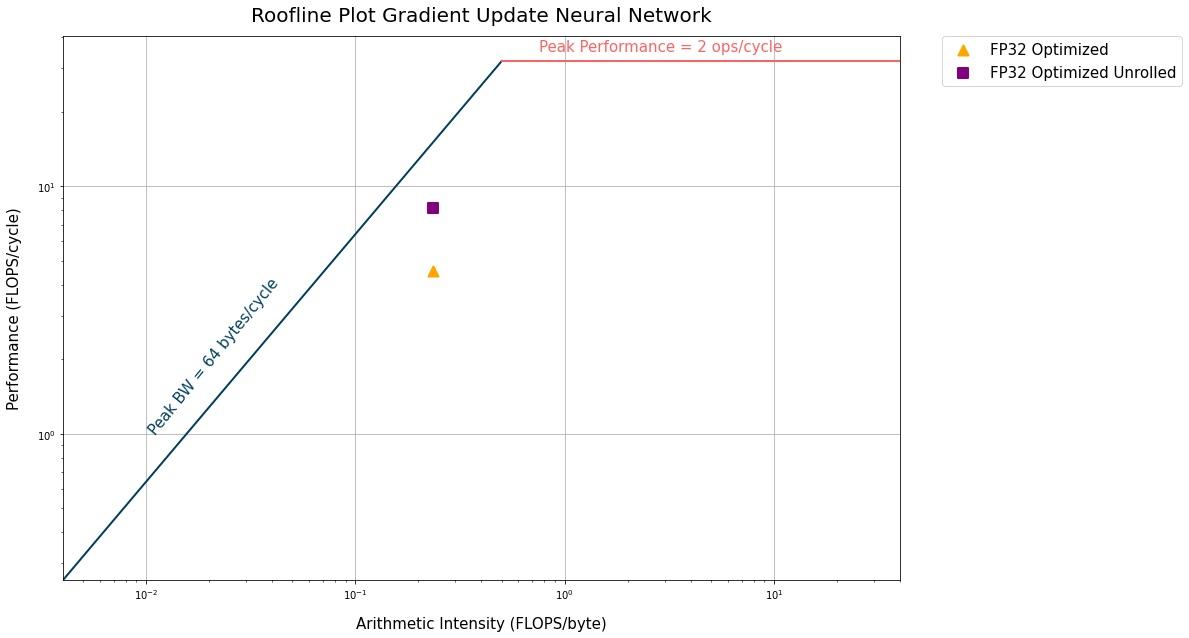

In [244]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.5, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 51, color='#003f5c')
plt.text(0.75, 35,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.525, xmax = 2, linewidth=2)
plt.scatter(GU_arith_intensity, GU_FLOPS_fp32opt, color='orange', label='FP32 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp32opt_unrolled, color='purple', label='FP32 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network', fontsize=20, pad=15)
plt.show()

# FP16

In [245]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 4 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES# instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp16opt = 2759
MAX_NUM_CYCLES_fp16opt_unrolled = 1543

# compute the maximum number of FLOPS for the layer
GU_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the GU layer: ", GU_FLOP_TOT)

# compute the number of data bytes for the layer
GU_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the GU layer: {} KB".format(GU_BYTES / 1024))


Cluster Peak Performance = 128 FLOPS/cycle
Maximum number of FLOPS for the GU layer:  50240.0
Data occupancy for the GU layer: 26.0625 KB


In [246]:
GU_FLOPS_fp16opt = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp16opt)
GU_FLOPS_fp16opt_unrolled = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp16opt_unrolled)

print("FLOPS/cycle for FP16 optimized GU layer: ", GU_FLOPS_fp16opt)
print("FLOPS/cycle for FP16 optimized unrolled GU layer: ", GU_FLOPS_fp16opt_unrolled)

FLOPS/cycle for FP16 optimized GU layer:  18.20949619427329
FLOPS/cycle for FP16 optimized unrolled GU layer:  32.5599481529488


In [247]:
GU_arith_intensity = GU_FLOP_TOT / GU_BYTES
print("GU Arith Intensity:", GU_arith_intensity)

GU Arith Intensity: 1.8824940047961631


<ipython-input-270-97cbfcfd8992>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


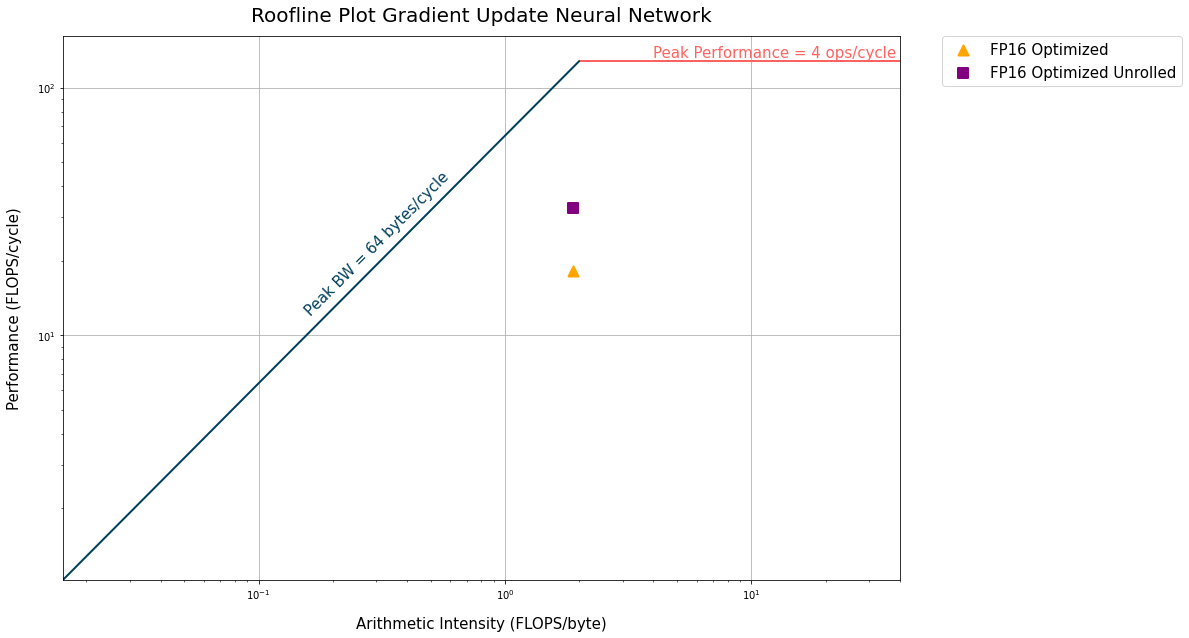

In [270]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 2.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.15, 12, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 45, color='#003f5c')
plt.text(4, 133,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.619, xmax = 2, linewidth=2)
plt.scatter(GU_arith_intensity, GU_FLOPS_fp16opt, color='orange', label='FP16 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp16opt_unrolled, color='purple', label='FP16 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network', fontsize=20, pad=15)
plt.show()

# FP8

In [271]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 8 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES # instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp8opt = 2038
MAX_NUM_CYCLES_fp8opt_unrolled = 1308

# compute the maximum number of FLOPS for the layer
GU_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the GU layer: ", GU_FLOP_TOT)

# compute the number of data bytes for the layer
GU_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the GU layer: {} KB".format(GU_BYTES / 1024))


Cluster Peak Performance = 256 FLOPS/cycle
Maximum number of FLOPS for the GU layer:  50240.0
Data occupancy for the GU layer: 13.03125 KB


In [272]:
# GU_FLOPS_fp8base = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp8base)
GU_FLOPS_fp8opt = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp8opt)
GU_FLOPS_fp8opt_unrolled = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp8opt_unrolled)

# print("GU FLOPS FP8 Baseline: ", GU_FLOPS_fp8base)
print("GU FLOPS FP8 Optimized: ", GU_FLOPS_fp8opt)
print("GU FLOPS FP8 Optimized Unrolled: ", GU_FLOPS_fp64opt_unrolled)

GU FLOPS FP8 Optimized:  24.65161923454367
GU FLOPS FP8 Optimized Unrolled:  9.497164461247637


In [273]:
GU_arith_intensity = GU_FLOP_TOT / GU_BYTES
print("GU Arith Intensity:", GU_arith_intensity)

GU Arith Intensity: 3.7649880095923263


<ipython-input-278-4034e1ddb6e5>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


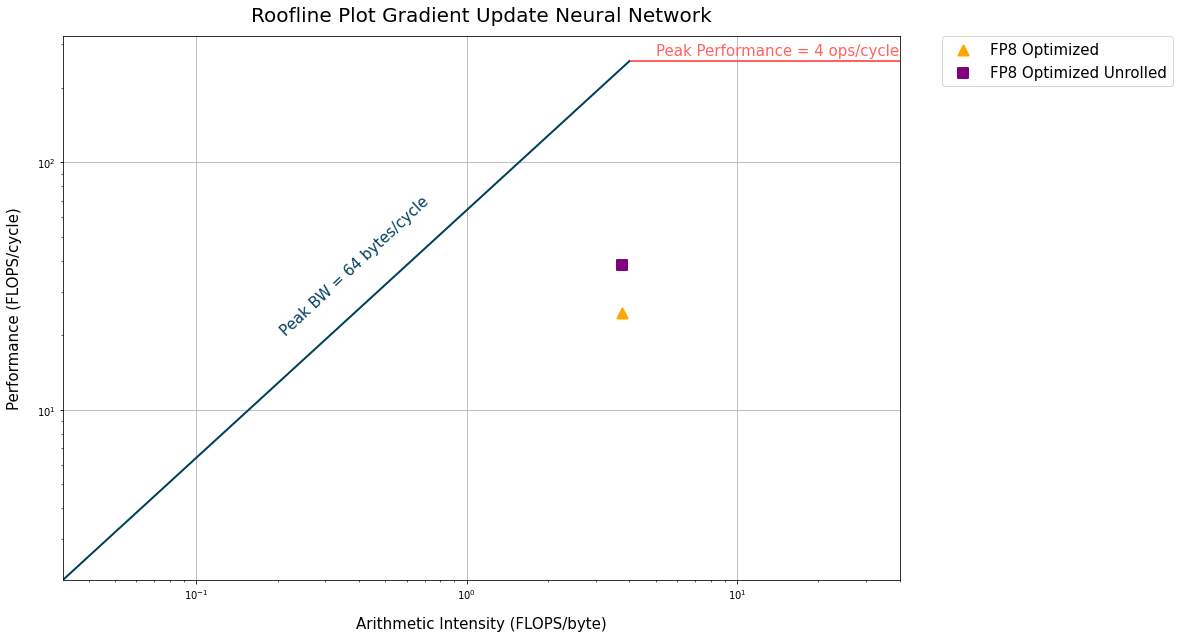

In [278]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 4.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.2, 20, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 43, color='#003f5c')
plt.text(5, 270,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.679, xmax = 2, linewidth=2)
plt.scatter(GU_arith_intensity, GU_FLOPS_fp8opt, color='orange', label='FP8 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp8opt_unrolled, color='purple', label='FP8 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network', fontsize=20, pad=15)
plt.show()

# Training Step

# FP64

In [287]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 1 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOP = 2 * NUM_SIMD_VECS
peak_performance = FMAC_FLOP * NUM_CORES # instructions/cycle

# get the cycle count of the gradient update layer
MAX_NUM_CYCLES_fp64base = 171711
MAX_NUM_CYCLES_fp64opt = 2834
MAX_NUM_CYCLES_fp64opt_unrolled = 2722

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
TS_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP
print("Maximum number of FLOPS for the gradient update layer: ", TS_FLOP_TOT)

# compute the number of data bytes for the layer
TS_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the gradient update layer: {} KB".format(TS_BYTES / 1024))


Maximum number of FLOPS for the gradient update layer:  25120
Data occupancy for the gradient update layer: 104.25 KB


In [288]:
TS_FLOPS_fp64base = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp64base)
TS_FLOPS_fp64opt = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp64opt)
TS_FLOPS_fp64opt_unrolled = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp64opt_unrolled)

print("TS FLOPS FP64 Baseline: ", TS_FLOPS_fp64base)
print("TS FLOPS FP64 Optimized: ", TS_FLOPS_fp64opt)
print("TS FLOPS FP64 Optimized Unrolled: ", TS_FLOPS_fp64opt_unrolled)

TS FLOPS FP64 Baseline:  0.1462923167415017
TS FLOPS FP64 Optimized:  8.86379675370501
TS FLOPS FP64 Optimized Unrolled:  9.228508449669361


In [289]:
TS_arith_intensity = TS_FLOP_TOT / TS_BYTES
print("TS Arith Intensity:", TS_arith_intensity)

TS Arith Intensity: 0.2353117505995204


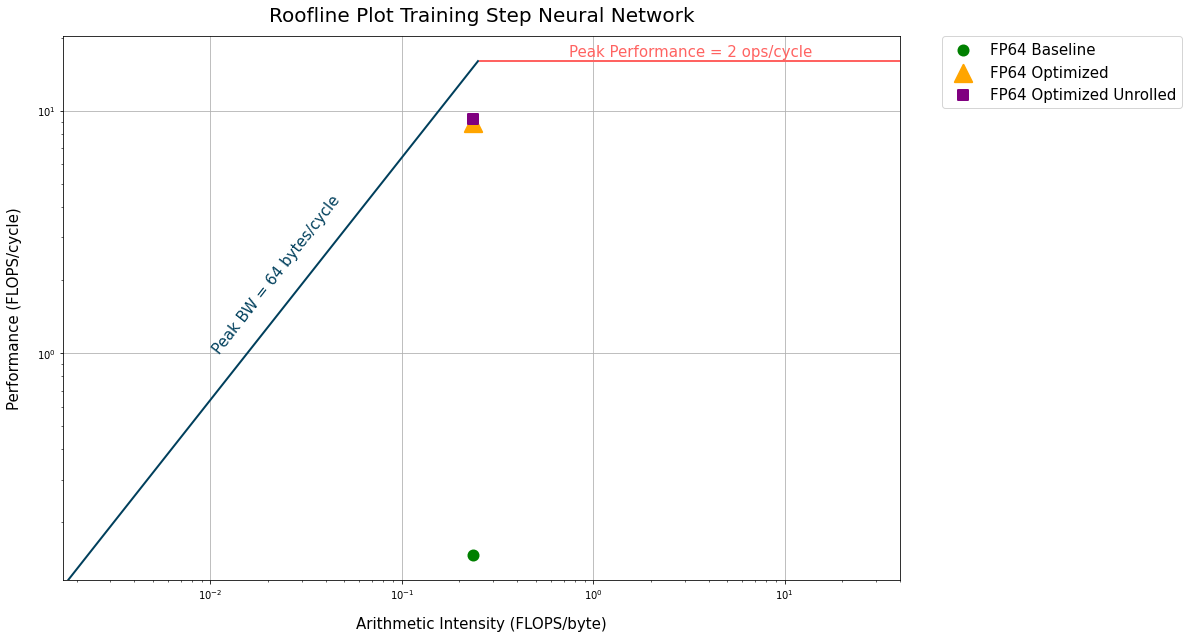

In [290]:
# scatter plot in log scale
plt.rcParams["figure.figsize"] = (15,10)
x = np.linspace(0, 0.25, 100)
y = peak_BW * x 
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 52, color='#003f5c')
plt.text(0.75, 16.8,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.498, xmax = 2, linewidth=2)
plt.scatter(TS_arith_intensity, TS_FLOPS_fp64base, color='green', label='FP64 Baseline', s=100, linewidth = 2, marker='o')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp64opt, color='orange', label='FP64 Optimized', s=300, linewidth = 2, marker='^')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp64opt_unrolled, color='purple', label='FP64 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([1.7*10e-4, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Training Step Neural Network', fontsize=20, pad=15)
plt.show()

# FP32

In [324]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOP = 2 #* NUM_SIMD_VECS
peak_performance = FMAC_FLOP * NUM_CORES # instructions/cycle

# get the cycle count of the gradient update layer
MAX_NUM_CYCLES_fp32opt = 2834
MAX_NUM_CYCLES_fp32opt_unrolled = 2722

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
TS_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP
print("Maximum number of FLOPS for the gradient update layer: ", TS_FLOP_TOT)

# compute the number of data bytes for the layer
TS_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the gradient update layer: {} KB".format(TS_BYTES / 1024))

Maximum number of FLOPS for the gradient update layer:  25120
Data occupancy for the gradient update layer: 52.125 KB


In [325]:
TS_arith_intensity = TS_FLOP_TOT / TS_BYTES
print("TS Arith Intensity:", TS_arith_intensity)

TS Arith Intensity: 0.4706235011990408


In [326]:
TS_FLOPS_fp32opt = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
TS_FLOPS_fp32opt_unrolled = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("TS FLOPS FP32 Optimized: ", TS_FLOPS_fp32opt)
print("TS FLOPS FP32 Optimized Unrolled: ", TS_FLOPS_fp32opt_unrolled)

TS FLOPS FP32 Optimized:  8.86379675370501
TS FLOPS FP32 Optimized Unrolled:  9.228508449669361


<ipython-input-327-5be5379e9ca7>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


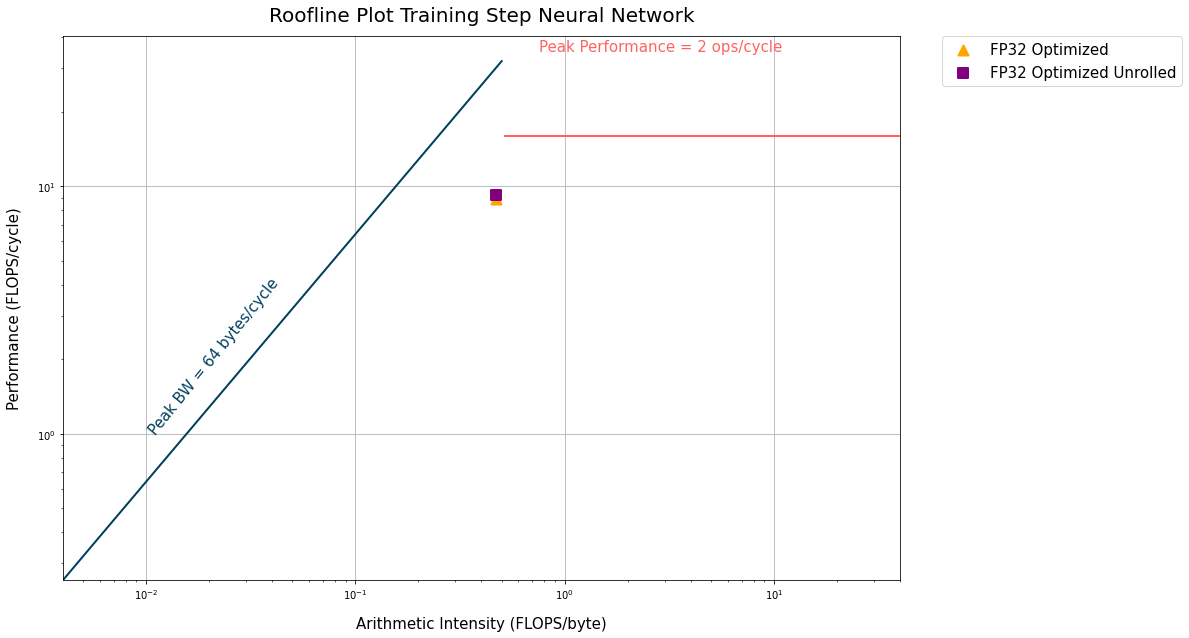

In [327]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.5, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 51, color='#003f5c')
plt.text(0.75, 35,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.528, xmax = 2, linewidth=2)
plt.scatter(TS_arith_intensity, TS_FLOPS_fp32opt, color='orange', label='FP32 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp32opt_unrolled, color='purple', label='FP32 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Training Step Neural Network', fontsize=20, pad=15)
plt.show()

# FP16

In [423]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 4 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES # instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp16opt = 2759
MAX_NUM_CYCLES_fp16opt_unrolled = 1743

# compute the maximum number of FLOPS for the layer
TS_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the TS layer: ", TS_FLOP_TOT)

# compute the number of data bytes for the layer
TS_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the TS layer: {} KB".format(TS_BYTES / 1024))


Cluster Peak Performance = 128 FLOPS/cycle
Maximum number of FLOPS for the TS layer:  50240.0
Data occupancy for the TS layer: 26.0625 KB


In [424]:
TS_FLOPS_fp16opt = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp16opt)
TS_FLOPS_fp16opt_unrolled = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp16opt_unrolled)

print("FLOPS/cycle for FP16 optimized TS layer: ", TS_FLOPS_fp16opt)
print("FLOPS/cycle for FP16 optimized unrolled TS layer: ", TS_FLOPS_fp16opt_unrolled)

FLOPS/cycle for FP16 optimized TS layer:  18.20949619427329
FLOPS/cycle for FP16 optimized unrolled TS layer:  28.82386689615605


In [425]:
TS_arith_intensity = TS_FLOP_TOT / TS_BYTES
print("TS Arith Intensity:", TS_arith_intensity)

TS Arith Intensity: 1.8824940047961631


<ipython-input-426-55e75b07deae>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


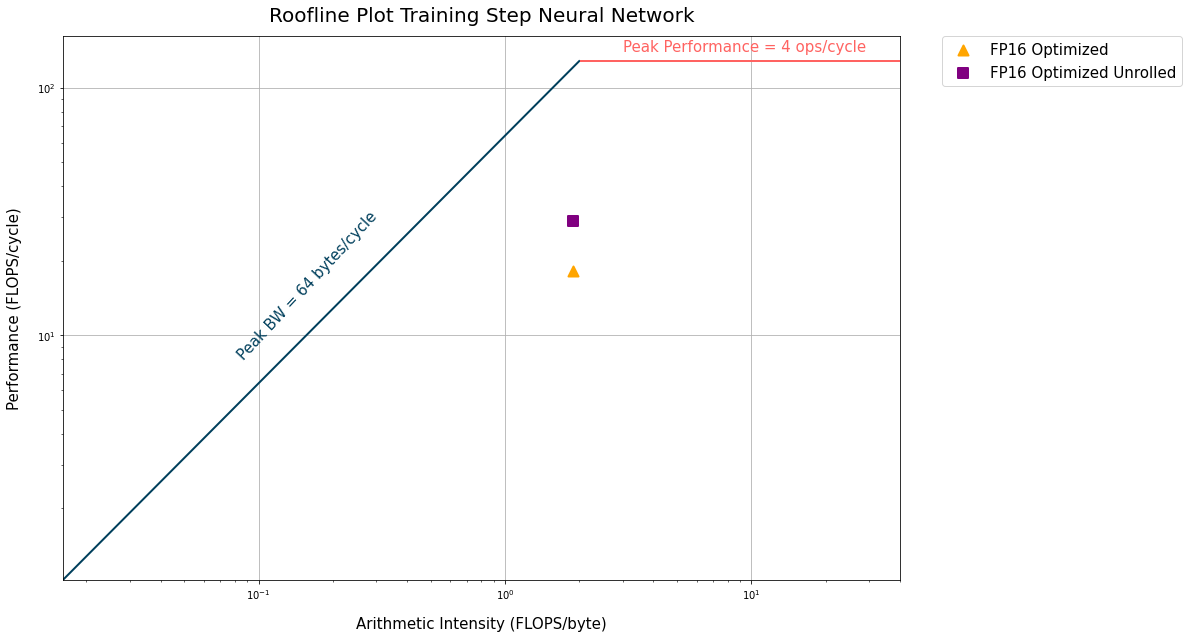

In [426]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 2.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.08, 8, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 47, color='#003f5c')
plt.text(3, 140,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.619, xmax = 2, linewidth=2)
plt.scatter(TS_arith_intensity, TS_FLOPS_fp16opt, color='orange', label='FP16 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp16opt_unrolled, color='purple', label='FP16 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Training Step Neural Network', fontsize=20, pad=15)
plt.show()

# FP8 

In [343]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 784
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 8 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES # instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp8opt = 1846
MAX_NUM_CYCLES_fp8opt_unrolled = 1213

# compute the maximum number of FLOPS for the layer
TS_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the TS layer: ", TS_FLOP_TOT)

# compute the number of data bytes for the layer
TS_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the TS layer: {} KB".format(TS_BYTES / 1024))


Cluster Peak Performance = 256 FLOPS/cycle
Maximum number of FLOPS for the TS layer:  50240.0
Data occupancy for the TS layer: 13.03125 KB


In [344]:
# GU_FLOPS_fp8base = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp8base)
TS_FLOPS_fp8opt = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp8opt)
TS_FLOPS_fp8opt_unrolled = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp8opt_unrolled)

# print("TS FLOPS FP8 Baseline: ", TS_FLOPS_fp8base)
print("TS FLOPS FP8 Optimized: ", TS_FLOPS_fp8opt)
print("TS FLOPS FP8 Optimized Unrolled: ", TS_FLOPS_fp64opt_unrolled)

TS FLOPS FP8 Optimized:  27.215601300108343
TS FLOPS FP8 Optimized Unrolled:  9.228508449669361


In [345]:
TS_arith_intensity = TS_FLOP_TOT / TS_BYTES
print("TS Arith Intensity:", TS_arith_intensity)

TS Arith Intensity: 3.7649880095923263


<ipython-input-346-2b8aa18a9c2d>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


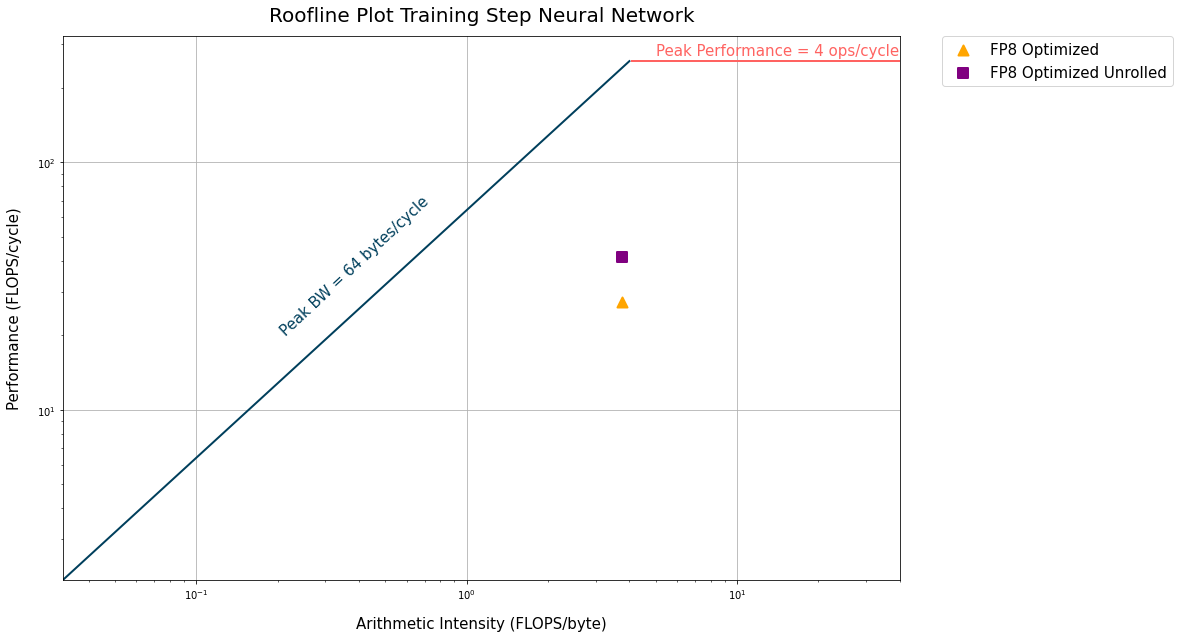

In [346]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 4.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.2, 20, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 43, color='#003f5c')
plt.text(5, 270,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.68, xmax = 2, linewidth=2)
plt.scatter(TS_arith_intensity, TS_FLOPS_fp8opt, color='orange', label='FP8 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp8opt_unrolled, color='purple', label='FP8 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Training Step Neural Network', fontsize=20, pad=15)
plt.show()

# HIGH DIM

# FP32

In [347]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 40 * 40
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp32opt = 6893
MAX_NUM_CYCLES_fp32opt_unrolled = 2242

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * FMAC_FLOP
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Maximum number of FLOPS for the linear layer:  51200
Data occupancy for the linear layer: 106.3125 KB


In [348]:
LINEAR_FLOPS_fp32opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
LINEAR_FLOPS_fp32opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("FLOPS/cycle for FP32 optimized linear layer: ", LINEAR_FLOPS_fp32opt)
print("FLOPS/cycle for FP32 optimized unrolled linear layer: ", LINEAR_FLOPS_fp32opt_unrolled)

FLOPS/cycle for FP32 optimized linear layer:  7.427825330044973
FLOPS/cycle for FP32 optimized unrolled linear layer:  22.836752899197144


In [349]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 0.4703115814226925


<ipython-input-350-a9a8f3377a75>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


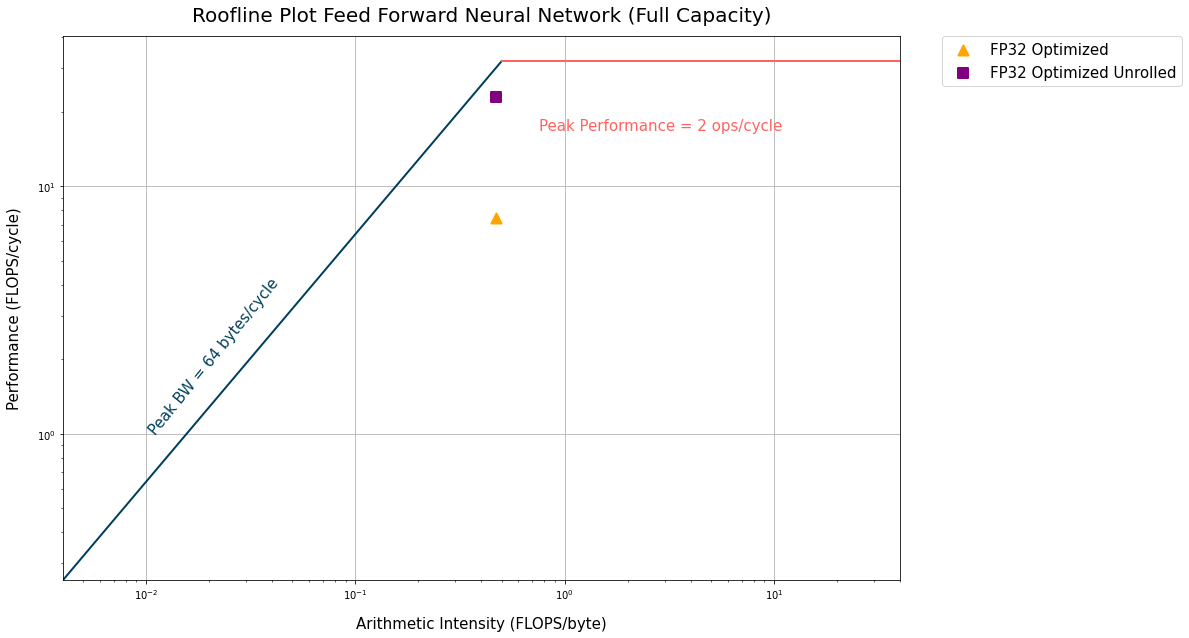

In [350]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.5, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 51, color='#003f5c')
plt.text(0.75, 16.8,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.525, xmax = 2, linewidth=2)
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt, color='orange', label='FP32 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp32opt_unrolled, color='purple', label='FP32 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# FP16

In [351]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 3 * 32 * 32
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 4 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp16opt = 6635
MAX_NUM_CYCLES_fp16opt_unrolled = 2749

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * FMAC_FLOP
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Maximum number of FLOPS for the linear layer:  98304
Data occupancy for the linear layer: 102.03125 KB


In [352]:
LINEAR_FLOPS_fp16opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
LINEAR_FLOPS_fp16opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("FLOPS/cycle for FP32 optimized linear layer: ", LINEAR_FLOPS_fp16opt)
print("FLOPS/cycle for FP32 optimized unrolled linear layer: ", LINEAR_FLOPS_fp16opt_unrolled)

FLOPS/cycle for FP32 optimized linear layer:  14.261424633686348
FLOPS/cycle for FP32 optimized unrolled linear layer:  43.846565566458516


In [353]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 0.9408882082695252


<ipython-input-355-f47caf21a3be>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


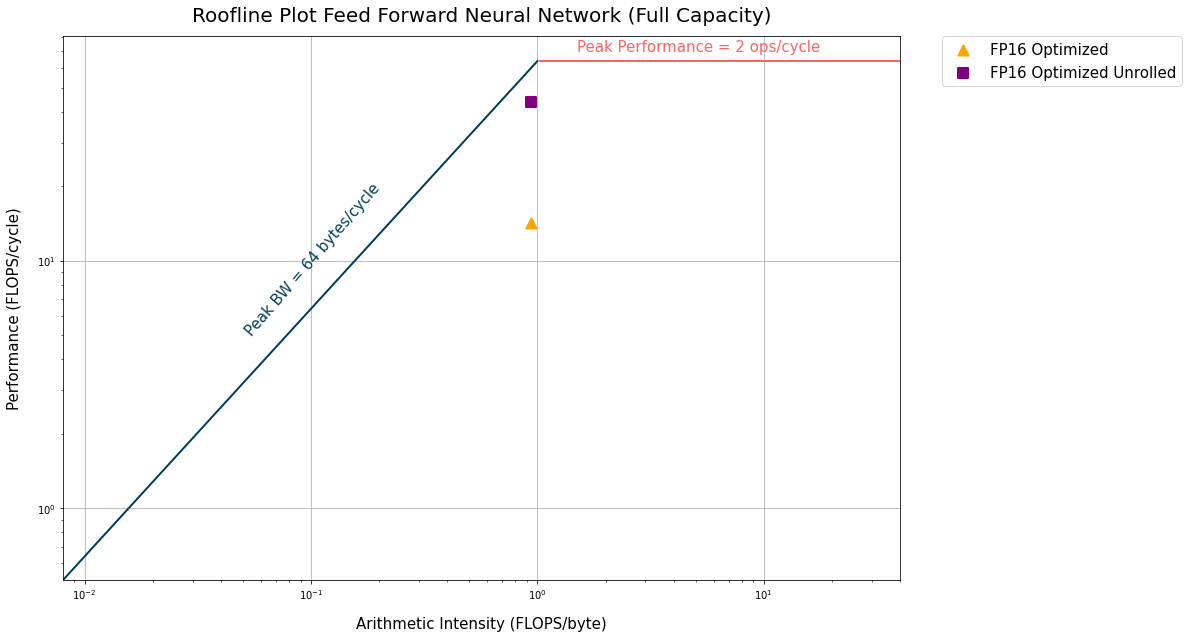

In [355]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 1, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.05, 5, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 49, color='#003f5c')
plt.text(1.5, 70,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.57, xmax = 2, linewidth=2)
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp16opt, color='orange', label='FP16 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp16opt_unrolled, color='purple', label='FP16 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# FP8

In [360]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 3 * 48 * 48
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 8 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp8opt = 7363
MAX_NUM_CYCLES_fp8opt_unrolled = 2445

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
LINEAR_FLOP_TOT = IN_CH * OUT_CH * FMAC_FLOP
print("Maximum number of FLOPS for the linear layer: ", LINEAR_FLOP_TOT)

# compute the number of data bytes for the layer
LINEAR_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the linear layer: {} KB".format(LINEAR_BYTES / 1024))


Maximum number of FLOPS for the linear layer:  221184
Data occupancy for the linear layer: 114.765625 KB


In [361]:
LINEAR_FLOPS_fp8opt = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
LINEAR_FLOPS_fp8opt_unrolled = get_flops_per_cycle(LINEAR_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("FLOPS/cycle for FP32 optimized linear layer: ", LINEAR_FLOPS_fp8opt)
print("FLOPS/cycle for FP32 optimized unrolled linear layer: ", LINEAR_FLOPS_fp8opt_unrolled)

FLOPS/cycle for FP32 optimized linear layer:  32.088205425794285
FLOPS/cycle for FP32 optimized unrolled linear layer:  98.65477252453167


In [362]:
linear_arith_intensity = LINEAR_FLOP_TOT / LINEAR_BYTES
print("Linear Arith Intensity:", linear_arith_intensity)

Linear Arith Intensity: 1.8820966643975494


<ipython-input-363-dd4df0131018>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


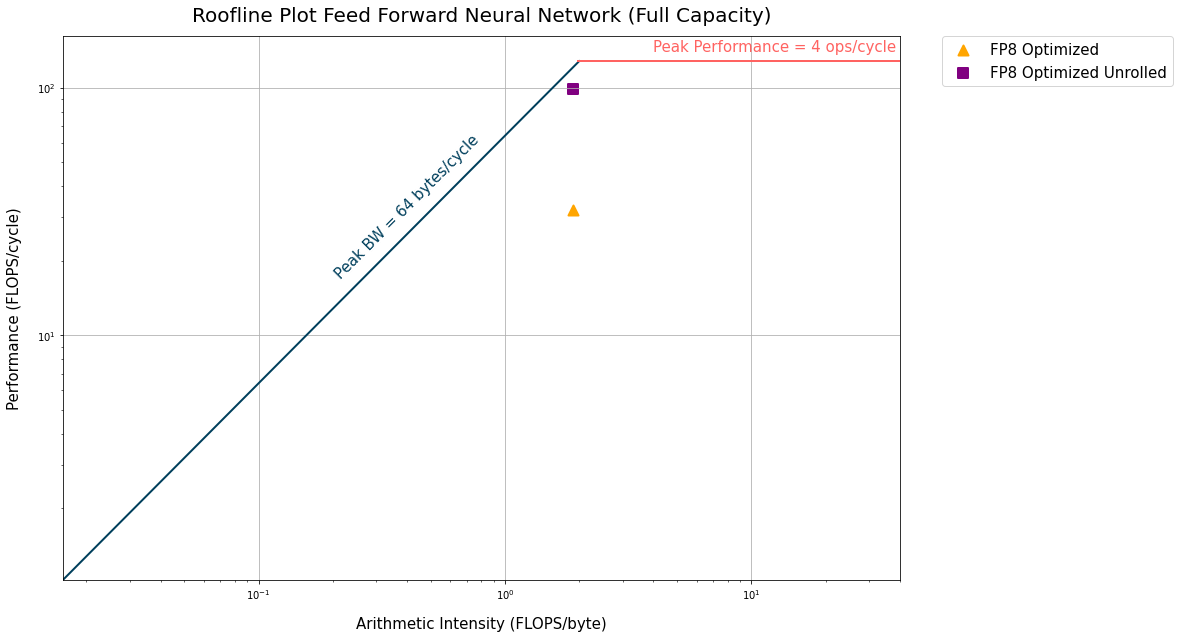

In [363]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 2.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.text(0.2, 17, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 45, color='#003f5c')
plt.text(4, 140,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.615, xmax = 2, linewidth=2)
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp8opt, color='orange', label='FP8 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(linear_arith_intensity, LINEAR_FLOPS_fp8opt_unrolled, color='purple', label='FP8 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Feed Forward Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# Gradient Update

# FP32

In [364]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 40 * 40
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp32opt = 8783
MAX_NUM_CYCLES_fp32opt_unrolled = 3890

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
GU_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP
print("Maximum number of FLOPS for the GU layer: ", GU_FLOP_TOT)

# compute the number of data bytes for the layer
GU_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the GU layer: {} KB".format(GU_BYTES / 1024))


Maximum number of FLOPS for the GU layer:  51232
Data occupancy for the GU layer: 106.3125 KB


In [365]:
GU_FLOPS_fp32opt = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
GU_FLOPS_fp32opt_unrolled = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("FLOPS/cycle for FP32 optimized GU layer: ", GU_FLOPS_fp32opt)
print("FLOPS/cycle for FP32 optimized unrolled GU layer: ", GU_FLOPS_fp32opt_unrolled)

FLOPS/cycle for FP32 optimized GU layer:  5.833086644654446
FLOPS/cycle for FP32 optimized unrolled GU layer:  13.170179948586119


In [366]:
GU_arith_intensity = GU_FLOP_TOT / GU_BYTES
print("GU Arith Intensity:", GU_arith_intensity)

GU Arith Intensity: 0.4706055261610817


<ipython-input-367-40f0d9cab14a>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


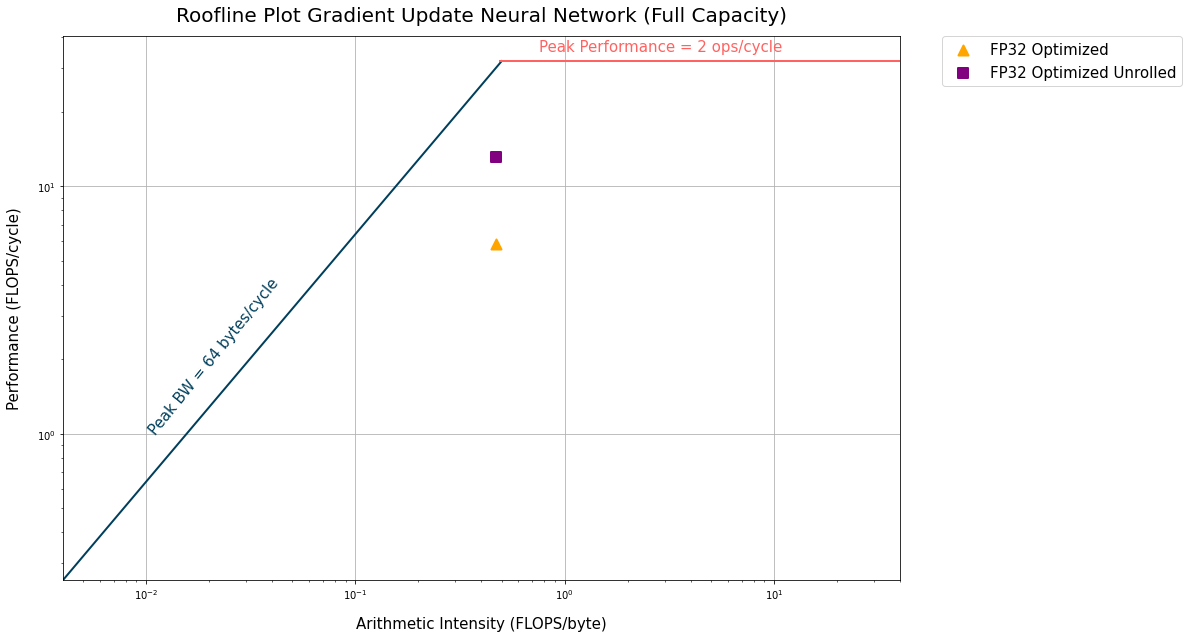

In [367]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.5, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 51, color='#003f5c')
plt.text(0.75, 35,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.522, xmax = 2, linewidth=2)
plt.scatter(GU_arith_intensity, GU_FLOPS_fp32opt, color='orange', label='FP32 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp32opt_unrolled, color='purple', label='FP32 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# FP16

In [368]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 3 * 32 * 32
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 4 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the GU layer
MAX_NUM_CYCLES_fp16opt = 8471
MAX_NUM_CYCLES_fp16opt_unrolled = 3790

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
GU_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP
print("Maximum number of FLOPS for the GU layer: ", GU_FLOP_TOT)

# compute the number of data bytes for the layer
GU_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the GU layer: {} KB".format(GU_BYTES / 1024))


Maximum number of FLOPS for the GU layer:  98336
Data occupancy for the GU layer: 102.03125 KB


In [369]:
GU_FLOPS_fp16opt = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp16opt)
GU_FLOPS_fp16opt_unrolled = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp16opt_unrolled)

print("FLOPS/cycle for FP16 optimized GU layer: ", GU_FLOPS_fp16opt)
print("FLOPS/cycle for FP16 optimized unrolled GU layer: ", GU_FLOPS_fp16opt_unrolled)

FLOPS/cycle for FP16 optimized GU layer:  11.60854680675245
FLOPS/cycle for FP16 optimized unrolled GU layer:  25.94617414248021


In [370]:
GU_arith_intensity = GU_FLOP_TOT / GU_BYTES
print("GU Arith Intensity:", GU_arith_intensity)

GU Arith Intensity: 0.9411944869831547


<ipython-input-371-8e1d340b100e>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


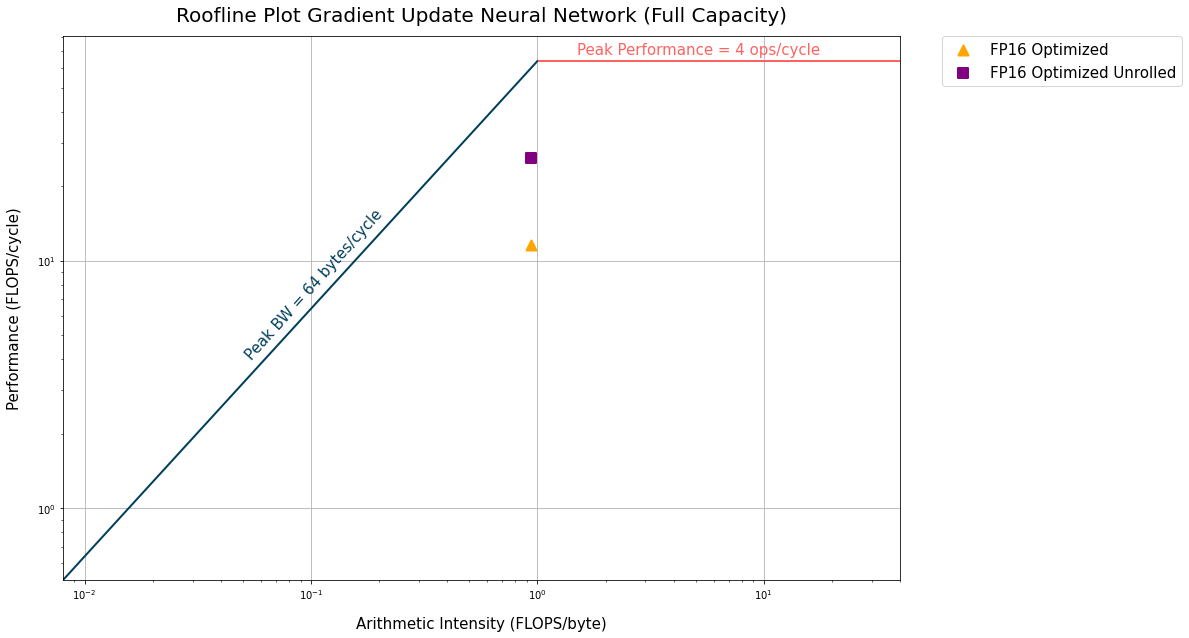

In [371]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 1, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.05, 4, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 48, color='#003f5c')
plt.text(1.5, 68,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.569, xmax = 2, linewidth=2)
plt.scatter(GU_arith_intensity, GU_FLOPS_fp16opt, color='orange', label='FP16 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp16opt_unrolled, color='purple', label='FP16 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# FP8

In [372]:
from tkinter.tix import ButtonBox
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 3 * 48 * 48
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
FMAC_FLOP = 2
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 8 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES * NUM_SIMD_VECS# instructions/cycle

# get the cycle count of the GU layer
MAX_NUM_CYCLES_fp8opt = 9693
MAX_NUM_CYCLES_fp8opt_unrolled = 4351

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
GU_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP
print("Maximum number of FLOPS for the GU layer: ", GU_FLOP_TOT)

# compute the number of data bytes for the layer
GU_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the GU layer: {} KB".format(GU_BYTES / 1024))


Maximum number of FLOPS for the GU layer:  221216
Data occupancy for the GU layer: 114.765625 KB


In [373]:
GU_FLOPS_fp8opt = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp8opt)
GU_FLOPS_fp8opt_unrolled = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp8opt_unrolled)

print("FLOPS/cycle for FP8 optimized GU layer: ", GU_FLOPS_fp8opt)
print("FLOPS/cycle for FP8 optimized unrolled GU layer: ", GU_FLOPS_fp8opt_unrolled)

FLOPS/cycle for FP8 optimized GU layer:  22.82224285566904
FLOPS/cycle for FP8 optimized unrolled GU layer:  50.84256492760285


In [374]:
GU_arith_intensity = GU_FLOP_TOT / GU_BYTES
print("GU Arith Intensity:", GU_arith_intensity)

GU Arith Intensity: 1.882368958475153


<ipython-input-393-55e20f0b8e54>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


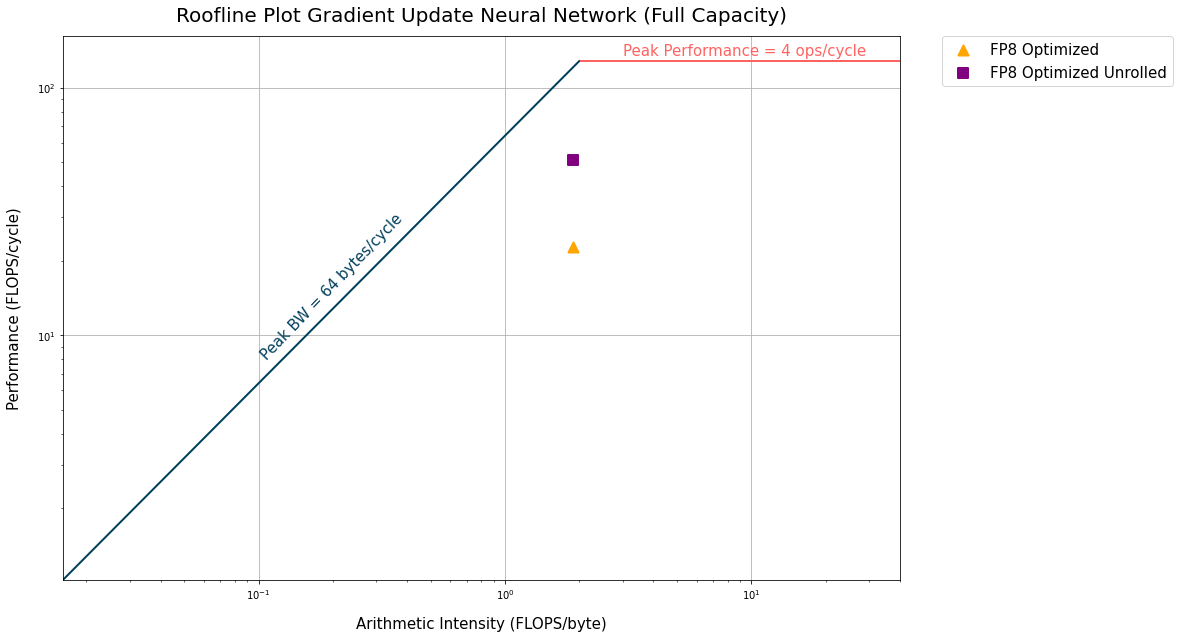

In [393]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 2, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.1, 8, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 46, color='#003f5c')
plt.text(3, 135,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.619, xmax = 2, linewidth=2)
plt.scatter(GU_arith_intensity, GU_FLOPS_fp8opt, color='orange', label='FP8 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(GU_arith_intensity, GU_FLOPS_fp8opt_unrolled, color='purple', label='FP8 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Gradient Update Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# Full Capacity Training Step

# FP32

In [402]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 40 * 40
OUT_CH = 16
NUM_BYTES = 8
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 2 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
FMAC_FLOP = 2 #* NUM_SIMD_VECS
peak_performance = FMAC_FLOP * NUM_CORES # instructions/cycle

# get the cycle count of the gradient update layer
MAX_NUM_CYCLES_fp32opt = 8813
MAX_NUM_CYCLES_fp32opt_unrolled = 4043

# compute the maximum number of FLOPS for the cluster
FMAC_FLOP_peak_per_cluster = FMAC_FLOP * NUM_CORES 

# compute the maximum number of FLOPS for the layer
TS_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * FMAC_FLOP
print("Maximum number of FLOPS for the gradient update layer: ", TS_FLOP_TOT)

# compute the number of data bytes for the layer
TS_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the gradient update layer: {} KB".format(TS_BYTES / 1024))

Maximum number of FLOPS for the gradient update layer:  51232
Data occupancy for the gradient update layer: 106.3125 KB


In [403]:
TS_arith_intensity = TS_FLOP_TOT / TS_BYTES
print("TS Arith Intensity:", TS_arith_intensity)

TS Arith Intensity: 0.4706055261610817


In [404]:
TS_FLOPS_fp32opt = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp32opt)
TS_FLOPS_fp32opt_unrolled = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp32opt_unrolled)

print("TS FLOPS FP32 Optimized: ", TS_FLOPS_fp32opt)
print("TS FLOPS FP32 Optimized Unrolled: ", TS_FLOPS_fp32opt_unrolled)

TS FLOPS FP32 Optimized:  5.813230455009645
TS FLOPS FP32 Optimized Unrolled:  12.671778382389315


<ipython-input-420-f20093357833>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


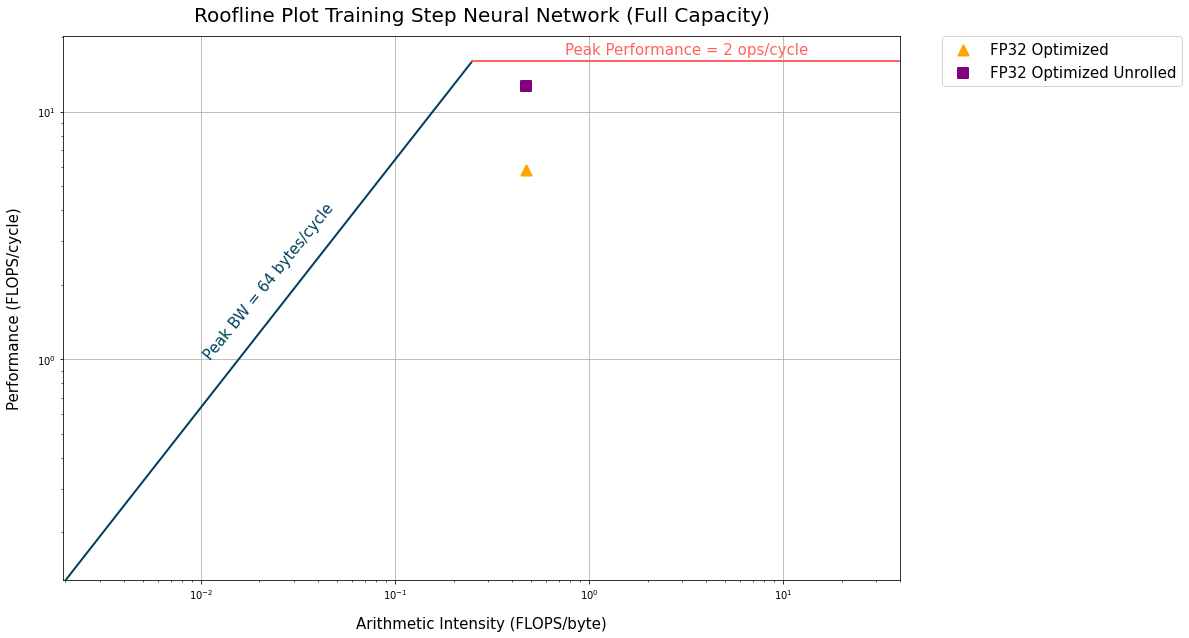

In [420]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.25, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.01, 1, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 51, color='#003f5c')
plt.text(0.75, 17,'Peak Performance = 2 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin=0.489, xmax = 2, linewidth=2)
plt.scatter(TS_arith_intensity, TS_FLOPS_fp32opt, color='orange', label='FP32 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp32opt_unrolled, color='purple', label='FP32 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Training Step Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# FP16 

In [436]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 3 * 32 * 32
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 4 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES # instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp16opt = 8518
MAX_NUM_CYCLES_fp16opt_unrolled = 3905

# compute the maximum number of FLOPS for the layer
TS_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the TS layer: ", TS_FLOP_TOT)

# compute the number of data bytes for the layer
TS_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the TS layer: {} KB".format(TS_BYTES / 1024))


Cluster Peak Performance = 128 FLOPS/cycle
Maximum number of FLOPS for the TS layer:  196672.0
Data occupancy for the TS layer: 102.03125 KB


In [437]:
TS_FLOPS_fp16opt = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp16opt)
TS_FLOPS_fp16opt_unrolled = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp16opt_unrolled)

print("FLOPS/cycle for FP16 optimized TS layer: ", TS_FLOPS_fp16opt)
print("FLOPS/cycle for FP16 optimized unrolled TS layer: ", TS_FLOPS_fp16opt_unrolled)

FLOPS/cycle for FP16 optimized TS layer:  23.088988025358066
FLOPS/cycle for FP16 optimized unrolled TS layer:  50.36414852752881


In [438]:
TS_arith_intensity = TS_FLOP_TOT / TS_BYTES
print("TS Arith Intensity:", TS_arith_intensity)

TS Arith Intensity: 1.8823889739663093


<ipython-input-440-cfe8c44834c5>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


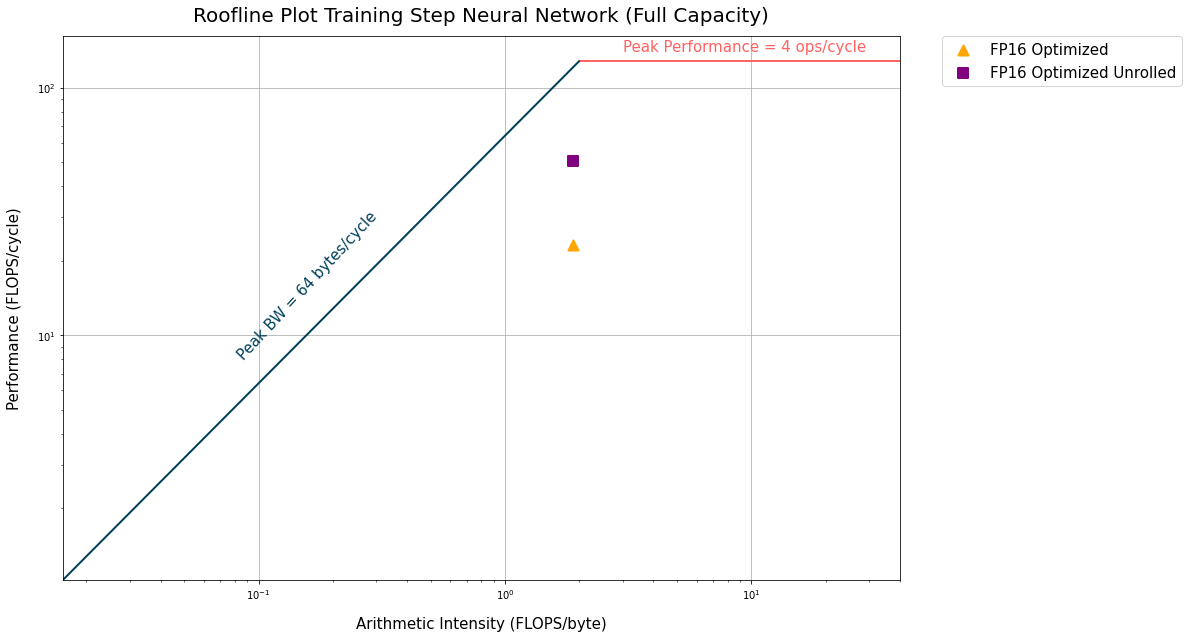

In [440]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 2.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.08, 8, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 47, color='#003f5c')
plt.text(3, 140,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.619, xmax = 2, linewidth=2)
plt.scatter(TS_arith_intensity, TS_FLOPS_fp16opt, color='orange', label='FP16 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp16opt_unrolled, color='purple', label='FP16 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Training Step Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()

# FP8

In [431]:
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle = 64 bytes/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 
# FLOP/s = cores * cycles/second * flops/cycle

# define constants
peak_BW = 64 # bytes/cycle
IN_CH = 3 * 48 * 48
OUT_CH = 16
NUM_BYTES = 8 
NUM_CORES = 8
NUM_ITERATIONS = 2
NUM_SIMD_VECS = 8 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
DOTPEX_FLOP = 4 * NUM_SIMD_VECS
peak_performance = DOTPEX_FLOP * NUM_CORES # instructions/cycle

print("Cluster Peak Performance = {} FLOPS/cycle".format(peak_performance))

# get the cycle count of the feedforward layer
MAX_NUM_CYCLES_fp8opt = 9484
MAX_NUM_CYCLES_fp8opt_unrolled = 4303

# compute the maximum number of FLOPS for the layer
TS_FLOP_TOT = (IN_CH * OUT_CH + OUT_CH) * DOTPEX_FLOP / NUM_SIMD_VECS
print("Maximum number of FLOPS for the TS layer: ", TS_FLOP_TOT)

# compute the number of data bytes for the layer
TS_BYTES = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / NUM_SIMD_VECS
print("Data occupancy for the TS layer: {} KB".format(TS_BYTES / 1024))


Cluster Peak Performance = 256 FLOPS/cycle
Maximum number of FLOPS for the TS layer:  442432.0
Data occupancy for the TS layer: 114.765625 KB


In [432]:
# GU_FLOPS_fp8base = get_flops_per_cycle(GU_FLOP_TOT, MAX_NUM_CYCLES_fp8base)
TS_FLOPS_fp8opt = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp8opt)
TS_FLOPS_fp8opt_unrolled = get_flops_per_cycle(TS_FLOP_TOT, MAX_NUM_CYCLES_fp8opt_unrolled)

# print("TS FLOPS FP8 Baseline: ", TS_FLOPS_fp8base)
print("TS FLOPS FP8 Optimized: ", TS_FLOPS_fp8opt)
print("TS FLOPS FP8 Optimized Unrolled: ", TS_FLOPS_fp64opt_unrolled)

TS FLOPS FP8 Optimized:  46.65035849852383
TS FLOPS FP8 Optimized Unrolled:  9.228508449669361


In [433]:
TS_arith_intensity = TS_FLOP_TOT / TS_BYTES
print("TS Arith Intensity:", TS_arith_intensity)

TS Arith Intensity: 3.764737916950306


<ipython-input-435-eedab6b34695>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 40])


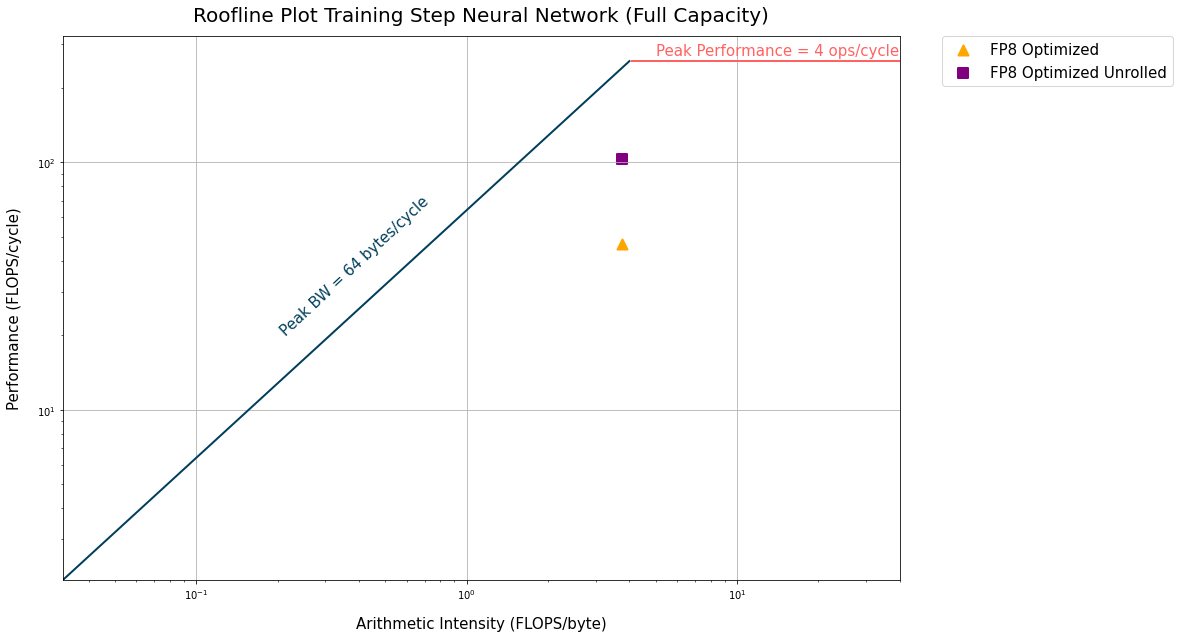

In [435]:
# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 4.0, 100)
y = peak_BW * x 

# scatter plot in log scale
plt.xscale('log')
plt.yscale('log')
plt.text(0.2, 20, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=15, rotation = 43, color='#003f5c')
plt.text(5, 270,'Peak Performance = 4 ops/cycle', fontsize=15, color='#ff6361')
plt.plot(x, y, '-', color='#003f5c', linewidth=2)
plt.axhline(y=peak_performance, color='#ff6361', linestyle='-', xmin = 0.68, xmax = 2, linewidth=2)
plt.scatter(TS_arith_intensity, TS_FLOPS_fp8opt, color='orange', label='FP8 Optimized', s=100, linewidth = 2, marker='^')
plt.scatter(TS_arith_intensity, TS_FLOPS_fp8opt_unrolled, color='purple', label='FP8 Optimized Unrolled', s=100, linewidth = 2, marker='s')
plt.xlim([0, 40])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)', fontsize=15, labelpad=15)
plt.ylabel('Performance (FLOPS/cycle)', fontsize=15, labelpad=15)
plt.title('Roofline Plot Training Step Neural Network (Full Capacity)', fontsize=20, pad=15)
plt.show()